In [69]:
entropy = pyBigWig.open("human_informme_results/NME-colon_normal-filled.bw")
intervals = np.array(entropy.intervals("chr1"))

In [70]:
entropy_values = intervals[:, 2]

In [1]:
from scipy.ndimage import gaussian_filter

In [73]:
start = 100000
end = 102000

In [74]:
entropy_values_g = []
sigma_values = np.linspace(1, 4, 5)
for sigma in sigma_values:
    entropy_values_g.append(gaussian_filter(entropy_values[start:end], sigma=sigma))

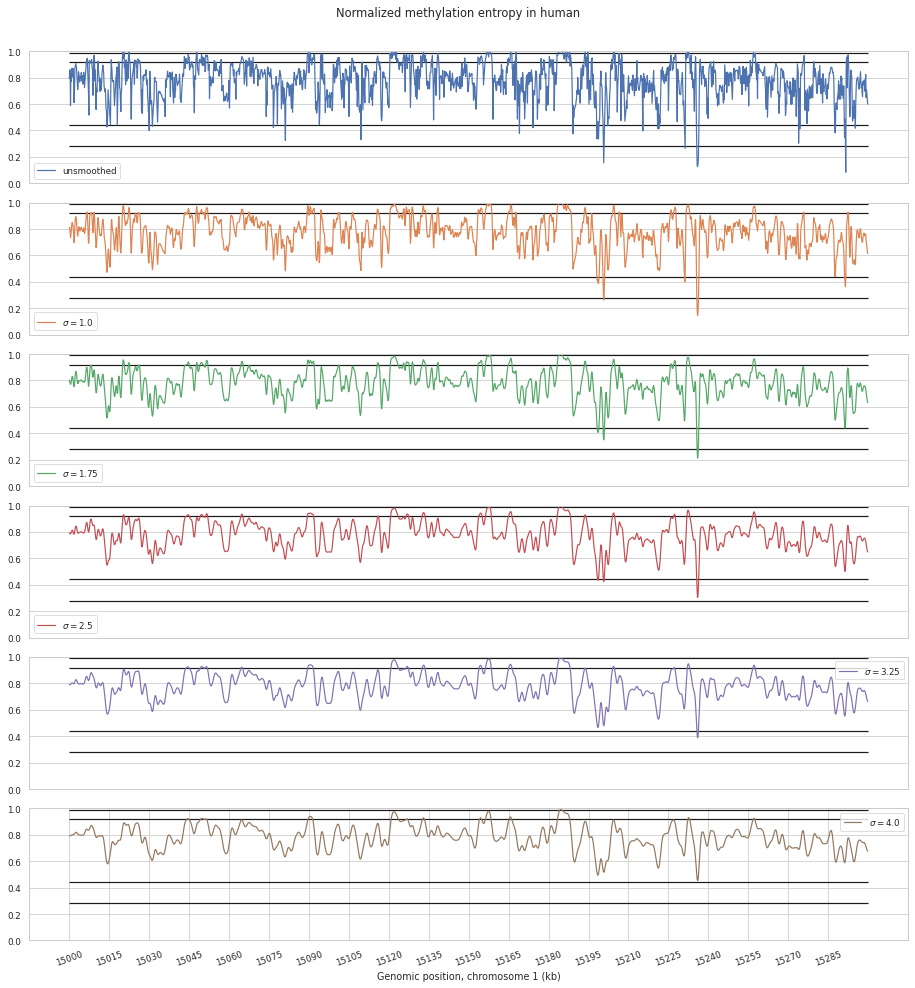

In [75]:
nrows = 6
fig, ax = plt.subplots(ncols=1, nrows=nrows, sharey=True, figsize=(12.8, 2.4 * nrows))
ax[0].plot(entropy_values[start:end], label="unsmoothed")

for i, sigma in enumerate(sigma_values):
    ax[i + 1].plot(entropy_values_g[i], label=fr"$\sigma={sigma}$", color=f"C{i + 1}")

for i in range(6):    
    ax[i].hlines([.28, .44, .92, .99], 0, end - start, )
    ax[i].set_ylim(0, 1)
#     ax[i].set_xlim(0, 1000)
    ax[i].legend()
    ax[i].set_xticks([])
    
ax[-1].set_xticks(np.arange(0, end - start, 100))
ax[-1].set_xticklabels(np.arange(start * 150 // 1000, end * 150 // 1000, 100 * 150 // 1000), rotation=20)
ax[-1].set_xlabel("Genomic position, chromosome 1 (kb)")
plt.suptitle("Normalized methylation entropy in human")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])    
plt.savefig(f"figures/human_entropy_gaussian{start}{end}.jpg", dpi=200)
plt.show()